In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

df = pd.read_csv('datasets/4113_project/data.csv')

<h1><font color='blue'>Data Preparation<font></h1>

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
df.shape

(30697, 25)

In [5]:
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [6]:
summary=pd.DataFrame(data = {"features":df.dtypes.values,"is null":df.isnull().sum().values},index = df.dtypes.index)
summary

,features,is null
action_type,object,0
combined_shot_type,object,0
game_event_id,int64,0
game_id,int64,0
lat,float64,0
loc_x,int64,0
loc_y,int64,0
lon,float64,0
minutes_remaining,int64,0
period,int64,0


In [7]:
nan_index = df[df['shot_made_flag'].isnull()].index
nan_index

Int64Index([    0,     7,    16,    19,    32,    33,    34,    35,    36,
               37,
            ...
            30646, 30648, 30655, 30659, 30664, 30668, 30680, 30682, 30686,
            30693],
           dtype='int64', length=5000)

In [8]:
Shots_to_predict = df[df['shot_made_flag'].isnull()]
Shots_to_train = df[df['shot_made_flag'].notna()]

In [9]:
Shots_to_train['shot_made_flag'].value_counts(normalize = True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

<h1><font color='blue'>Data Exploration</font></h1>

In [10]:
Shots_to_train.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [11]:
corr_mat = Shots_to_train.corr().loc["shot_made_flag",:]
corr_mat

game_event_id       -0.037232
game_id             -0.001612
lat                  0.148070
loc_x               -0.000848
loc_y               -0.148070
lon                 -0.000848
minutes_remaining    0.028342
period              -0.032152
playoffs            -0.001257
seconds_remaining    0.030804
shot_distance       -0.198242
shot_made_flag       1.000000
team_id                   NaN
shot_id             -0.013016
Name: shot_made_flag, dtype: float64

In [12]:
corr1=Shots_to_train.loc[:,["shot_made_flag","minutes_remaining"]].groupby("shot_made_flag").mean()
corr1

,minutes_remaining
shot_made_flag,
0.0,4.798974
1.0,4.995813


In [13]:
corr2=Shots_to_train.loc[:,["shot_made_flag","shot_distance"]].groupby("shot_made_flag").mean()
corr2

,shot_distance
shot_made_flag,
0.0,15.127600
1.0,11.383428


In [14]:
Shots_to_train[
    ['action_type','shot_made_flag']
].groupby('action_type').mean().assign(
    number_of_occurance = Shots_to_train['action_type'].value_counts()
).sort_values(
    by = 'number_of_occurance',ascending = False
)

,shot_made_flag,number_of_occurance
action_type,,
Jump Shot,0.326913,15836
Layup Shot,0.385330,2154
Driving Layup Shot,0.741400,1628
Turnaround Jump Shot,0.598204,891
Fadeaway Jump Shot,0.574541,872
Running Jump Shot,0.747112,779
Pullup Jump shot,0.723881,402
Turnaround Fadeaway shot,0.584699,366
Slam Dunk Shot,0.982036,334


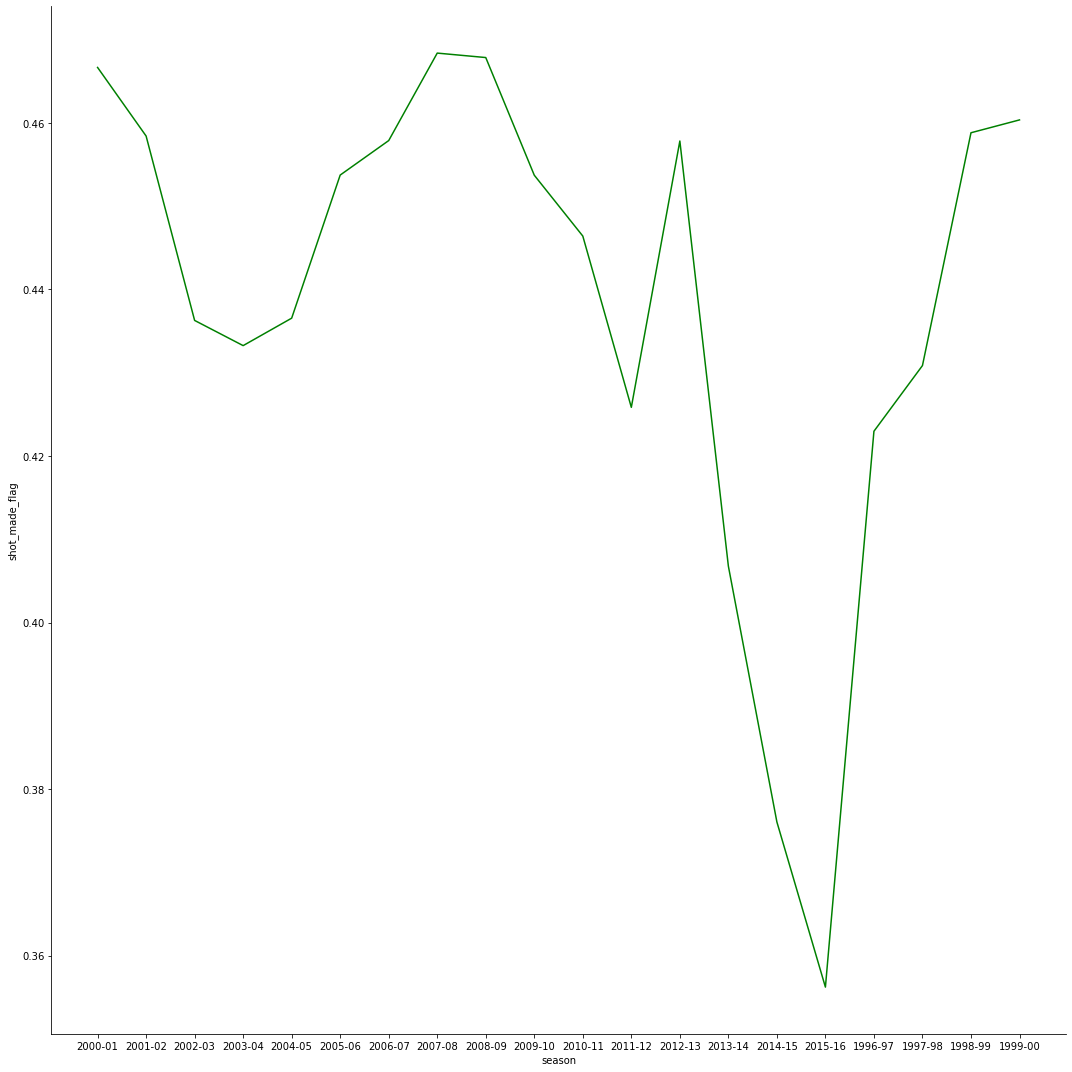

In [15]:
seasons = sns.FacetGrid(Shots_to_train, height = 15)
seasons.map(sns.lineplot, 'season','shot_made_flag',ci = None ,color = 'green')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


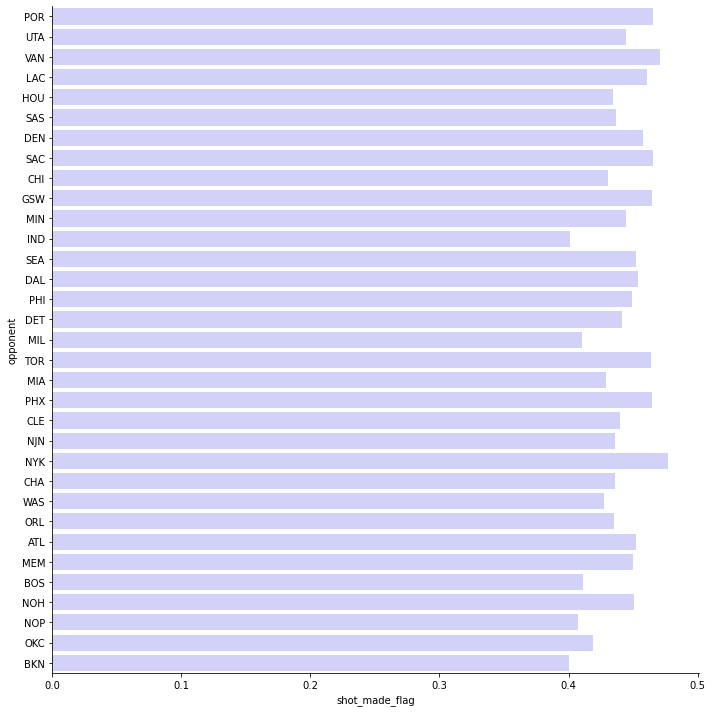

In [16]:
g = sns.FacetGrid(Shots_to_train, height = 10)
g.map(sns.barplot,'shot_made_flag','opponent',ci = None, color = 'blue', alpha = 0.2 );

<h1><font color='blue'>Further Data Preparation for Training</font></h1>

In [17]:
Shots_to_train = Shots_to_train.loc[
    (Shots_to_train['action_type'].isin(Shots_to_predict['action_type'].unique())),:
]
Shots_to_train.shape

(25674, 25)

In [18]:
def dataset_for_testing(in_data):
    
    in_data['time_remaining'] = (48 - in_data['period'].values*12 + in_data['minutes_remaining'].values)

    dataset = in_data[['shot_distance','minutes_remaining']]
    dataset = pd.concat([dataset, pd.get_dummies(in_data['action_type'],prefix = "_")],axis =1)
    dataset = pd.concat([dataset, pd.get_dummies(in_data['shot_type'], prefix = 'shot_type')],axis =1)
    dataset = pd.concat([dataset, pd.get_dummies(in_data['shot_zone_area'], prefix = 'zone')], axis =1)
    dataset= pd.concat([dataset, pd.get_dummies(in_data['playoffs'], prefix = 'offs')], axis =1)
    dataset = pd.concat([dataset,pd.get_dummies(in_data['period'], prefix = 'Q')], axis = 1)
    
    return dataset

In [19]:
X = dataset_for_testing(Shots_to_train)
y = Shots_to_train[['shot_made_flag']]
X_sub = dataset_for_testing(Shots_to_predict)
X_sub = X_sub.drop(columns="__Running Tip Shot", axis = 0)

<ipython-input-18-6015b400138c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_data['time_remaining'] = (48 - in_data['period'].values*12 + in_data['minutes_remaining'].values)


In [20]:
X.columns

Index(['shot_distance', 'minutes_remaining', '__Alley Oop Dunk Shot',
       '__Alley Oop Layup shot', '__Driving Bank shot', '__Driving Dunk Shot',
       '__Driving Finger Roll Layup Shot', '__Driving Finger Roll Shot',
       '__Driving Floating Jump Shot', '__Driving Hook Shot',
       '__Driving Jump shot', '__Driving Layup Shot',
       '__Driving Reverse Layup Shot', '__Driving Slam Dunk Shot',
       '__Dunk Shot', '__Fadeaway Bank shot', '__Fadeaway Jump Shot',
       '__Finger Roll Layup Shot', '__Finger Roll Shot',
       '__Floating Jump shot', '__Follow Up Dunk Shot', '__Hook Shot',
       '__Jump Bank Shot', '__Jump Hook Shot', '__Jump Shot', '__Layup Shot',
       '__Pullup Bank shot', '__Pullup Jump shot', '__Putback Dunk Shot',
       '__Putback Layup Shot', '__Reverse Dunk Shot', '__Reverse Layup Shot',
       '__Reverse Slam Dunk Shot', '__Running Bank shot',
       '__Running Dunk Shot', '__Running Finger Roll Layup Shot',
       '__Running Hook Shot', '__Running Ju

In [21]:
y.head()

,shot_made_flag
1,0.0
2,1.0
3,0.0
4,1.0
5,0.0


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 1,stratify = y)

<h1><font color:'red'>1st Classifier: <i><b>Random Forest</b></i></font></h1>

In [23]:
forest = RandomForestClassifier()
forest_score = cross_val_score(estimator=forest,
                              X= X_train,
                              y = y_train,
                              cv = 10)

forest_score = round(forest_score.mean(),ndigits=4)
forest_score_test = round(forest.fit(X_train,y_train).score(X_test,y_test), ndigits=4)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

<h1><font color:'red'>2nd Classifier: <i><b>K-Nearest Neighbours</b></i></font></h1>

In [24]:
knn_param_grid = {'n_neighbors': np.arange(1, 5),
              'weights': ['uniform','distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, 
                               return_train_score=True, scoring = 'roc_auc')
knn_grid_search.fit(X_train, y_train)
knn_result = pd.DataFrame(knn_grid_search.cv_results_)

knn_prediction = knn_grid_search.predict(X_test)
knn_score_test = roc_auc_score(y_test, knn_prediction)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y

<h1><font color:'red'>3rd Classifier: <i><b>Logistic Regression</b></i></font></h1>

In [25]:
log_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid_search = GridSearchCV(LogisticRegression(random_state = 0, solver = 'lbfgs'), log_param_grid, cv=5, return_train_score=True, scoring = 'roc_auc')
log_grid_search.fit(X_train, y_train)

log_result = pd.DataFrame(log_grid_search.cv_results_)

log_prediction = log_grid_search.predict(X_test)
log_score_test = roc_auc_score(y_test, log_prediction)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  r

<h1><font color:'red'>4th Classifier: <i><b>Decision Tree</b></i></font></h1>

In [26]:
tree = DecisionTreeClassifier()


tree_score = cross_val_score(estimator=tree,
                            X= X_train,
                            y = y_train,
                            cv = 10)

tree_score = round(tree_score.mean(),ndigits=4)
tree_score_test = round(tree.fit(X_train,y_train).score(X_test,y_test), ndigits=4)

In [30]:
cross_val_score(estimator=tree,
                            X= X_train,
                            y = y_train,
                            cv = 10)

array([0.60567297, 0.60879243, 0.60267112, 0.62214802, 0.6032276 ,
       0.61880913, 0.60823595, 0.61213133, 0.60434057, 0.61825264])

<h1><font color='blue'>Result and Scores</font></h1>

In [28]:
models = pd.DataFrame(
    {'Model':['Random Forest', 'KNN Classifier','Logistic Regression','Decision Tree'],
                       'Cross Validation Score':[forest_score,knn_grid_search.best_score_ ,log_grid_search.best_score_,tree_score],
                       'Test set Score':[forest_score_test,knn_score_test,log_score_test,tree_score_test]
})
models.sort_values(by = 'Cross Validation Score',ascending = False)

,Model,Cross Validation Score,Test set Score
2,Logistic Regression,0.689093,0.663302
0,Random Forest,0.619100,0.614800
1,KNN Classifier,0.611763,0.581434
3,Decision Tree,0.611300,0.614400


In [29]:
prob = log_grid_search.predict_proba(X_sub)[:, 1]
submission = new_sub = pd.DataFrame({'Shot_Id':Shots_to_predict['shot_id'],
                        'shot_made_flag':prob})

submission.to_csv("datasets/4113_project/Submission2.csv",index = False)